<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_analysis/blob/main/Learning_data_analysis/Courses/Partie_4/4-Analysez_deux_variables_quantitatives_par_r%C3%A9gression_lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysez deux variables quantitatives par régression linéaire

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(
    "https://raw.githubusercontent.com/Harlequelrah/Learning_data_analysis/refs/heads/main/Learning_data_analysis/Nettoyez_et_analysez_votre_jeu_de_données/data/operations.csv",
    parse_dates=[0],
)
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [ ]:
# Création de attente
import datetime as dt

# Sélection du sous-échantillon
courses = data[data["categ"] == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = courses["montant"].abs()

# calcul de la variable attente
r = []

last_date = dt.datetime.now()

for i,row in courses.iterrows():
  days = (row['date_operation']-last_date).days
  if days == 0 :
    r.append(r[-1])
  else:
    r.append(days)
  last_date = row["date_operation"]

courses["attente"]=r
courses = courses.iloc[1:,]

# On regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)

a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()

courses = pd.DataFrame({"montant":a,"attente":b})



# MCO
Une méthode pour minimiser l'erreur est la méthode des moindres carrés ordinaire (MCO) qui consiste à minimiser la somme des carrés de l'erreur $y_i - \hat{y_i}$

## Estimation de a et b

$
\hat{a} = \frac{s_{X,Y}}{s_{X}^{2}} \ et \ \hat{b} = \bar{y} - \hat{a}\bar{x}
$

In [ ]:
import statsmodels.api as sm

Y = courses['montant'] # à prédire

X = courses [['attente']] # features

X = X.copy() # on modifiera X donc créeons en une copie.

X['intercept'] = 1
#  intercept est la valeur du montant quand l'attente vaut 0

result = sm.OLS(Y,X).fit()
# OLS = Ordinary Least Square (Moindres Carrés Ordinaire)

a,b = result.params['attente'] , result.params['intercept']



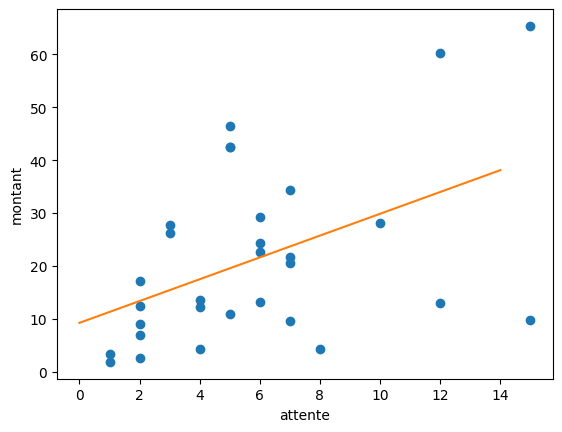

In [ ]:
plt.plot(courses.attente,courses.montant,'o')
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Les variations autours de la moyenne sont plus grande que les variations autour de la droite de regression

Si on a un modèle parfait on dira que le modèle à réussit à expliquer la totalité des variations .

Ce pourcentage est calculé grâce à la formule de décomposition de la variance (analysis of variance, en anglais : ANOVA).

SCT : somme des carrés totale (variation totale de Y)

SCE : somme des carrés expliquées (variation expliquée par le modèle)

SCR : somme des carrés résiduels (variation inexpliquée par le modèle)

SCT = SCE + SCR

$
\sum_{j=1}^{n} (y_j - \bar{y})^2
= \sum_{j=1}^{n} (\hat{y}_j - \bar{y})^2
+ \sum_{j=1}^{n} (y_j - \hat{y}_j)^2
$

Pour la régression linéaire le coefficient de détermination noté $R^{2}$ est en fait le carré du coefficient de corrélation linéaire
$R^{2} = \frac{SCE}{SCT}$


La regression linéaire avec MCO est peu robuste aux outliers comme le coefficient de corrélation linéaire.